In [1]:
import settings
import os
from emoji import Emoji
import numpy as np
from main import batch_load, map_y

import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense

2022-12-02 09:10:07,622 [INFO]: Logging is now in charge of logging.


[INFO] Settings: Start initializing.
[INFO] Settings: Folder already exists in Dir /home/loe/Projects/STATS-304/GP/.config/, skipping creation.
[INFO] Settings: Reading from file.
[INFO] Settings: Performing integrity check.
[INFO] Settings: New config file generated.
[INFO] Settings: Apply environment variable.
[INFO] Settings: Folder already exists in Dir /home/loe/Projects/STATS-304/GP/.config/, skipping creation.
[INFO] Settings: Folder already exists in Dir /home/loe/Projects/STATS-304/GP/.data, skipping creation.
[INFO] Settings: ROOT_DIR - /home/loe/Projects/STATS-304/GP
[INFO] Settings: CONFIG_DIR - /home/loe/Projects/STATS-304/GP/.config/
[INFO] Settings: DATA_DIR - /home/loe/Projects/STATS-304/GP/.data
[INFO] Settings: LOG_LEVEL - DEBUG
[INFO] Settings: Finish initializing.


2022-12-02 09:10:07.969004: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-02 09:10:08.971569: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-12-02 09:10:10.982656: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-12-02 09:10:10.982798: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or 

In [2]:
# Read the data
DATA_DIR = os.environ["DATA_DIR"]
X, y = batch_load(DATA_DIR, {"Facebook": "Meta", "Microsoft": "Microsoft", "Apple": "Apple"}, output_size=(72,72))
# Transform y
y = map_y(y)

/home/loe/.local/lib/python3.10/site-packages/PIL/Image.py:979: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [3]:
# Visualize input data
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")


X shape: (6226, 15552)
y shape: (6226,)


In [4]:
# Preprocessing the input data
# Normalize input vector

In [5]:
# Layout the model
input_dim = X.shape[1]
hidden_layers = 10
hidden_nodes = 20

model = tf.keras.models.Sequential()

model.add(Dense(hidden_nodes, activation = "relu", input_dim=input_dim))
for i in range(int(hidden_layers)):
    model.add(Dense(hidden_nodes, activation = "relu"))

model.add(Dense(3,activation = "sigmoid"))

model.summary()

model.compile(optimizer="rmsprop", loss="mse", metrics="mse")
print("Finish compiling")

2022-12-02 09:10:52.975726: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-02 09:10:53.150079: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-02 09:10:53.150321: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-02 09:10:53.153130: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                311060    
                                                                 
 dense_1 (Dense)             (None, 20)                420       
                                                                 
 dense_2 (Dense)             (None, 20)                420       
                                                                 
 dense_3 (Dense)             (None, 20)                420       
                                                                 
 dense_4 (Dense)             (None, 20)                420       
                                                                 
 dense_5 (Dense)             (None, 20)                420       
                                                                 
 dense_6 (Dense)             (None, 20)                4

In [6]:
# Train the model
with tf.device('/GPU:0'):
    history = model.fit(X,y, batch_size = 128, epochs=10, validation_split=0.2,verbose=True)

2022-12-02 09:10:55.823724: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 309795840 exceeds 10% of free system memory.
2022-12-02 09:10:56.171468: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 309795840 exceeds 10% of free system memory.


Epoch 1/10
39/39 [==============================] - 4s 22ms/step - loss: 0.8647 - mse: 0.8647 - val_loss: 8.2773e-04 - val_mse: 8.2773e-04
Epoch 2/10
39/39 [==============================] - 0s 11ms/step - loss: 0.8567 - mse: 0.8567 - val_loss: 7.8831e-08 - val_mse: 7.8831e-08
Epoch 3/10
39/39 [==============================] - 0s 11ms/step - loss: 0.8525 - mse: 0.8525 - val_loss: 1.0058e-12 - val_mse: 1.0058e-12
Epoch 4/10
39/39 [==============================] - 0s 12ms/step - loss: 0.8433 - mse: 0.8433 - val_loss: 2.4191e-11 - val_mse: 2.4191e-11
Epoch 5/10
39/39 [==============================] - 1s 30ms/step - loss: 0.8439 - mse: 0.8439 - val_loss: 9.8926e-10 - val_mse: 9.8926e-10
Epoch 6/10
39/39 [==============================] - 1s 36ms/step - loss: 0.8440 - mse: 0.8440 - val_loss: 2.3968e-12 - val_mse: 2.3968e-12
Epoch 7/10
39/39 [==============================] - 3s 79ms/step - loss: 0.8433 - mse: 0.8433 - val_loss: 3.5936e-11 - val_mse: 3.5936e-11
Epoch 8/10
39/39 [=========

In [7]:
# Evaluate the result

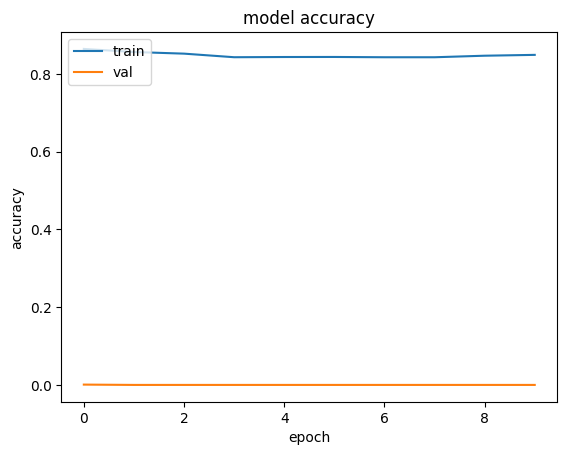

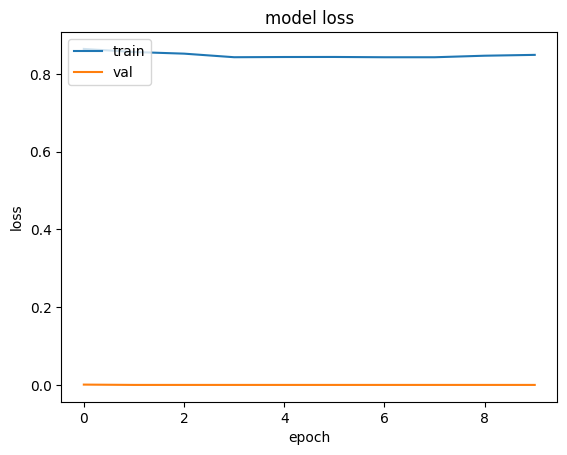

In [8]:
# Visualize the result
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()